# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [ ]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

In [ ]:
dados.shape

(76840, 7)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [ ]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [ ]:
quantidade_uf = dados['UF'].value_counts().reset_index()
quantidade_uf

,UF,count
0,São Paulo,8544
1,Minas Gerais,7686
2,Rio Grande do Sul,6322
3,Bahia,5717
4,Rio de Janeiro,5556
5,Pará,4449
6,Paraná,4356
7,Pernambuco,3820
8,Goiás,3478
9,Ceará,3359


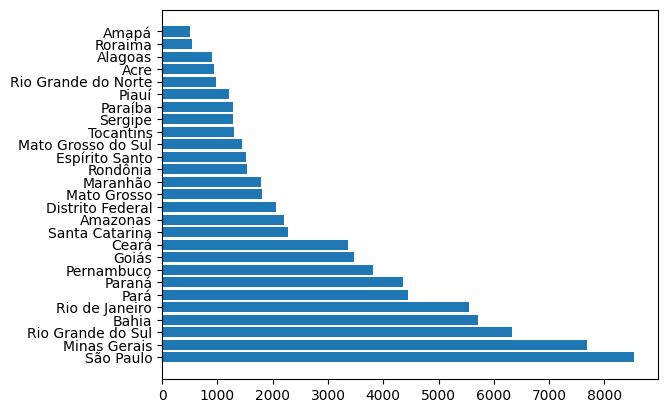

In [ ]:
plt.barh(quantidade_uf['UF'],quantidade_uf['count'])
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

In [ ]:
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

##### Sexo

In [ ]:
dados['sexo_categorico'] = pd.Categorical(
    dados['Sexo'],
    categories=[0,1],
    ordered=True
)
dados['sexo_categorico']

,sexo_categorico
0,0
1,1
2,1
3,0
4,1
...,...
76835,1
76836,0
76837,0
76838,0


In [ ]:
dados['sexo_categorico'] = dados['sexo_categorico'].map(sexo)
dados['sexo_categorico']

,sexo_categorico
0,Masculino
1,Feminino
2,Feminino
3,Masculino
4,Feminino
...,...
76835,Feminino
76836,Masculino
76837,Masculino
76838,Masculino


In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino
1,Rondônia,1,23,2,12,1150,1.74,Feminino
2,Rondônia,1,35,8,15,880,1.76,Feminino
3,Rondônia,0,46,2,6,3500,1.78,Masculino
4,Rondônia,1,47,8,9,150,1.69,Feminino


##### Cor

In [ ]:
dados['cor_categorico'] = pd.Categorical(
    dados['Cor'],
    categories=[0,2,4,6,8],
    ordered=True
)
dados['cor_categorico']

,cor_categorico
0,8
1,2
2,8
3,2
4,8
...,...
76835,2
76836,4
76837,8
76838,8


In [ ]:
dados['cor_categorico'] = dados['cor_categorico'].map(cor)
dados['cor_categorico']

,cor_categorico
0,Parda
1,Branca
2,Parda
3,Branca
4,Parda
...,...
76835,Branca
76836,Preta
76837,Parda
76838,Parda


In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda


##### Anos de Estudo

In [ ]:
dados['anos_de_estudo_categorico'] = pd.Categorical(
    dados['Anos.de.Estudo'],
    categories=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    ordered=True
)
dados['anos_de_estudo_categorico']

,anos_de_estudo_categorico
0,12
1,12
2,15
3,6
4,9
...,...
76835,11
76836,7
76837,12
76838,4


In [ ]:
dados['anos_de_estudo_categorico'] = dados['anos_de_estudo_categorico'].map(anos_de_estudo)
dados['anos_de_estudo_categorico']

,anos_de_estudo_categorico
0,11 anos
1,11 anos
2,14 anos
3,5 anos
4,8 anos
...,...
76835,10 anos
76836,6 anos
76837,11 anos
76838,3 anos


In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,anos_de_estudo_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


#### **Apresente em texto a menor e maior `Renda` da base de dados**

In [ ]:
print(f"A renda da base de dados vai de: {min(dados['Renda'])} até {max(dados['Renda'])}")

A renda da base de dados vai de: 0 até 200000


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [ ]:
tabela_frequencia=(
    dados.groupby('sexo_categorico')
    .size()
    .reset_index(name='Fi')
)
tabela_frequencia


/tmp/ipython-input-19-210041440.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados.groupby('sexo_categorico')


,sexo_categorico,Fi
0,Masculino,53250
1,Feminino,23590


In [ ]:
tabela_frequencia['Fri'] = round((tabela_frequencia['Fi']/tabela_frequencia['Fi'].sum())*100,2)
tabela_frequencia

,sexo_categorico,Fi,Fri
0,Masculino,53250,69.3
1,Feminino,23590,30.7


#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [ ]:
tabela_cruzada = pd.crosstab(dados['sexo_categorico'],dados['cor_categorico'])
tabela_cruzada

cor_categorico,Indígena,Branca,Preta,Amarela,Parda
sexo_categorico,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
tabela_relativa = round(pd.crosstab(dados['sexo_categorico'],dados['cor_categorico'],normalize='all')*100,1)
tabela_relativa

cor_categorico,Indígena,Branca,Preta,Amarela,Parda
sexo_categorico,,,,,
Masculino,0.3,28.9,7.2,0.3,32.6
Feminino,0.1,12.5,3.8,0.2,14.1


> #### Conclusões

A maioria dos indivíduos do sexo masculino se autodeclara como pardo (32,6%), seguido por branco (28,9%). As cores indígena (0,3%) e amarela (0,3%) representam uma parcela muito pequena.

Entre as mulheres, também há predominância das cores parda (14,1%) e branca (12,5%), porém em proporções significativamente menores em relação ao sexo masculino. As demais categorias (preta, indígena e amarela) possuem representatividade ainda menor, mas relativamente mais distribuída do que entre os homens.

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [ ]:
ticket_medio = round(pd.crosstab(dados['sexo_categorico'],dados['cor_categorico'],values=dados['Renda'],aggfunc='mean'),2)
ticket_medio

cor_categorico,Indígena,Branca,Preta,Amarela,Parda
sexo_categorico,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


> #### Conclusões

Ao analisar a média de renda por sexo e cor, observa-se que pessoas autodeclaradas como amarelas apresentam as maiores rendas médias, tanto entre homens quanto entre mulheres.
Essa diferença é significativa em relação aos demais grupos raciais.
Uma possível explicação é o fato de esse grupo representar uma minoria demográfica no Brasil, muitas vezes associada a níveis educacionais mais altos ou a posições profissionais específicas.

## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [ ]:
round(dados.Renda.mean(), 2)

np.float64(2000.38)

In [ ]:
int(dados.Renda.median())

1200

In [ ]:
moda = dados.Renda.mode()

In [ ]:
frequencia = dados[dados['Renda'].isin(moda.values)]
frequencia.Renda.value_counts()

,count
Renda,
788,6881


#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

In [ ]:
top5_renda = dados.groupby('UF').agg(media=('Renda', 'mean')).reset_index()
top5_renda = round(top5_renda.sort_values(by='media', ascending=False).head(5),2)
top5_renda

,UF,media
6,Distrito Federal,4241.95
25,São Paulo,2638.10
20,Rio de Janeiro,2496.40
13,Paraná,2493.87
23,Santa Catarina,2470.85


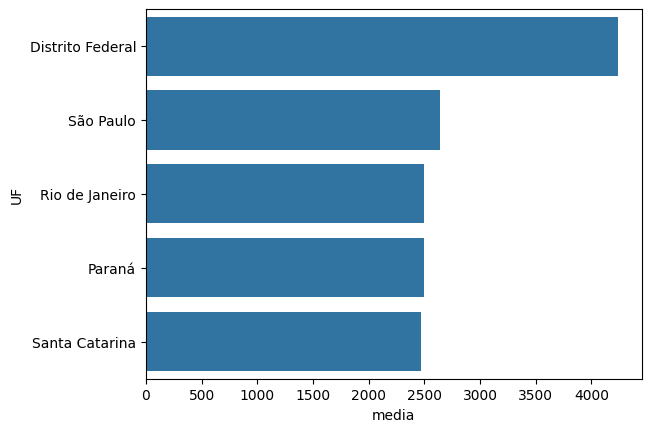

In [ ]:
sns.barplot(data=top5_renda, x='media', y='UF')
plt.show()

> #### Conclusões

Por meio do gráfico é notável que a média de renda é maior no Distrito federal e é de considerar uma certa difença para os restantes dos estados top 5 nas maiores médias de venda, podendo destacar por o distrito federal ser um estado menor relacionado aos outros do top 5 é justificável a média de renda ser maior.

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [ ]:
dados_sudeste = dados[dados['UF'].isin(['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'])]
dados_sudeste.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,anos_de_estudo_categorico
31818,Minas Gerais,0,40,2,12,1600,1.62,Masculino,Branca,11 anos
31819,Minas Gerais,0,58,8,5,850,1.58,Masculino,Parda,4 anos
31820,Minas Gerais,0,36,8,3,1400,1.75,Masculino,Parda,2 anos
31821,Minas Gerais,0,21,8,11,1500,1.66,Masculino,Parda,10 anos
31822,Minas Gerais,0,28,2,9,1600,1.62,Masculino,Branca,8 anos


##### **Média**

In [ ]:
renda_media = round(pd.crosstab(dados_sudeste['sexo_categorico'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='mean'), 2)
renda_media

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
sexo_categorico,,,,
Masculino,2129.32,2283.16,2777.55,2947.74
Feminino,1752.71,1489.62,1971.53,1950.18


##### **Mediana**

In [ ]:
renda_mediana = round(pd.crosstab(dados_sudeste['sexo_categorico'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='median'), 2)
renda_mediana

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
sexo_categorico,,,,
Masculino,1500.0,1400.0,1510.0,1820.0
Feminino,927.0,900.0,1040.5,1200.0


##### **Renda Máxima**

In [ ]:
renda_maxima = round(pd.crosstab(dados_sudeste['sexo_categorico'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='max'), 2)
renda_maxima

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
sexo_categorico,,,,
Masculino,40000,100000,200000,80000
Feminino,100000,30000,120000,50000


#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

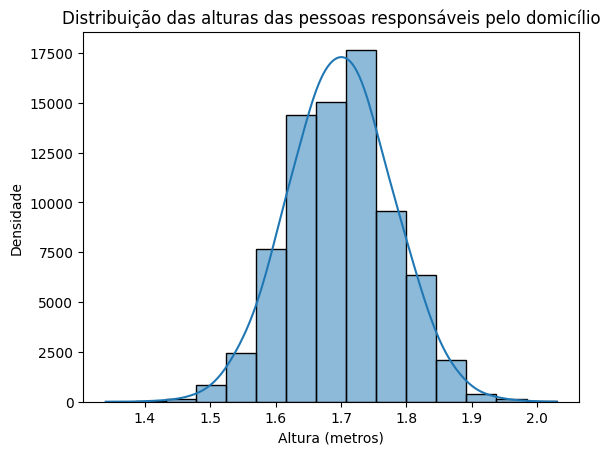

In [ ]:
sns.histplot(bins=15, data=dados, x='Altura', kde=True, kde_kws={'bw_adjust':2})
plt.title('Distribuição das alturas das pessoas responsáveis pelo domicílio')
plt.xlabel('Altura (metros)')
plt.ylabel('Densidade')
plt.show()

In [ ]:
altura_resumo ={
    'Média' : round(dados['Altura'].mean(),2),
    'Moda' : dados['Altura'].mode()[0],
    'Mediana' : dados['Altura'].median()
}
altura_resumo

{'Média': np.float64(1.7), 'Moda': np.float64(1.7), 'Mediana': 1.7}

> #### Conclusões

analisando o gráfico e o resumo de média, moda e mediana foi observada que o gráfico se trata de um gráfico simétrico onde os valores de média, moda e mediana são iguais.

##### **Idade**

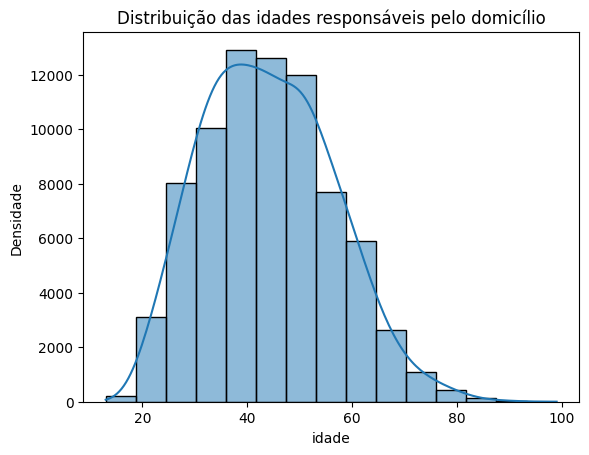

In [ ]:
sns.histplot(bins=15, data=dados, x='Idade', kde=True, kde_kws={'bw_adjust':2})
plt.title('Distribuição das idades responsáveis pelo domicílio')
plt.xlabel('idade')
plt.ylabel('Densidade')
plt.show()

In [ ]:
idade_resumo = {
    'Média' : round(dados['Idade'].mean(),2),
    'Moda' : dados['Idade'].mode()[0],
    'Mediana' : dados['Idade'].median()
}
idade_resumo

{'Média': np.float64(44.07), 'Moda': np.int64(40), 'Mediana': 43.0}

> #### Conclusões

Analisando os gráficos e as informações recebidas o nosso gráfico se trata de um gráfico assimétrico a direita onde o valor de média é maior que a moda e a mediana.

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [ ]:
renda_15k = dados[dados['Renda'] <= 15000]
renda_15k.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,anos_de_estudo_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [ ]:
import math

In [ ]:
n = len(renda_15k)
n

76219

In [ ]:
k = 1 + (10/3) * math.log10(n)
k = int(k)
k

17

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [ ]:
faixas = renda_15k.copy()
faixas['faixa_renda'] = pd.cut(renda_15k['Renda'],bins=int(k),include_lowest=True)
faixas.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,anos_de_estudo_categorico,faixa_renda
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos,"(-15.001, 882.353]"
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos,"(882.353, 1764.706]"
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos,"(-15.001, 882.353]"
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos,"(2647.059, 3529.412]"
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos,"(-15.001, 882.353]"


In [ ]:
tabela_frequencias = faixas.groupby('faixa_renda',observed=False ).size().reset_index(name='frequencia')
tabela_frequencias['porcentagem'] = round((tabela_frequencias['frequencia'] / len(faixas)) * 100,2)
tabela_frequencias

,faixa_renda,frequencia,porcentagem
0,"(-15.001, 882.353]",26311,34.52
1,"(882.353, 1764.706]",25816,33.87
2,"(1764.706, 2647.059]",10905,14.31
3,"(2647.059, 3529.412]",4854,6.37
4,"(3529.412, 4411.765]",2133,2.80
5,"(4411.765, 5294.118]",2180,2.86
6,"(5294.118, 6176.471]",1002,1.31
7,"(6176.471, 7058.824]",672,0.88
8,"(7058.824, 7941.176]",208,0.27
9,"(7941.176, 8823.529]",554,0.73


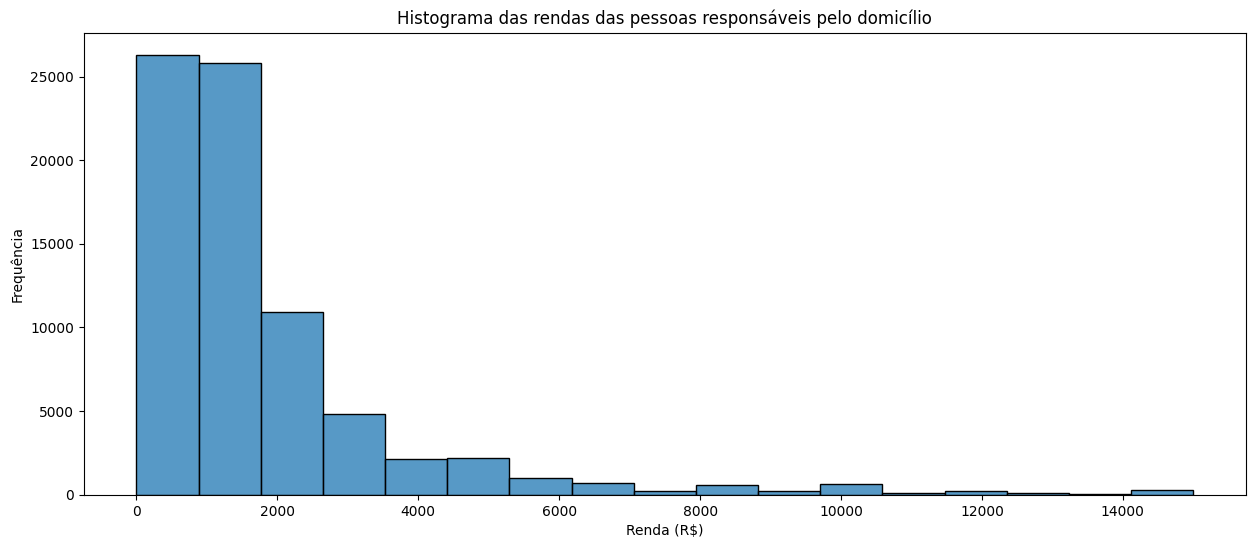

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(bins= k, data=renda_15k, x='Renda')
plt.title('Histograma das rendas das pessoas responsáveis pelo domicílio')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.show()

> #### Conclusões

Observado que na maioria dos casos de renda até 15000 a renda não atinge o valor de 2000 reais.

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [ ]:
percentual = round((dados['Renda'] <= 788).sum() / len(dados) * 100,2)
percentual

np.float64(28.87)

##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [ ]:
renda_maxima = dados['Renda'].quantile(0.95)
renda_maxima

np.float64(6000.0)

##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [ ]:
renda_minima = dados['Renda'].quantile(0.99)
renda_minima

np.float64(15000.0)

##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [ ]:
renda_6k = dados[dados['Renda'] <= 6000]
renda_6k.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,anos_de_estudo_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [ ]:
quartis ={
    'Q1' : renda_6k['Renda'].quantile(0.25),
    'Q2' : renda_6k['Renda'].quantile(0.50),
    'Q3' : renda_6k['Renda'].quantile(0.75)
}
quartis

{'Q1': np.float64(788.0), 'Q2': np.float64(1200.0), 'Q3': np.float64(2000.0)}

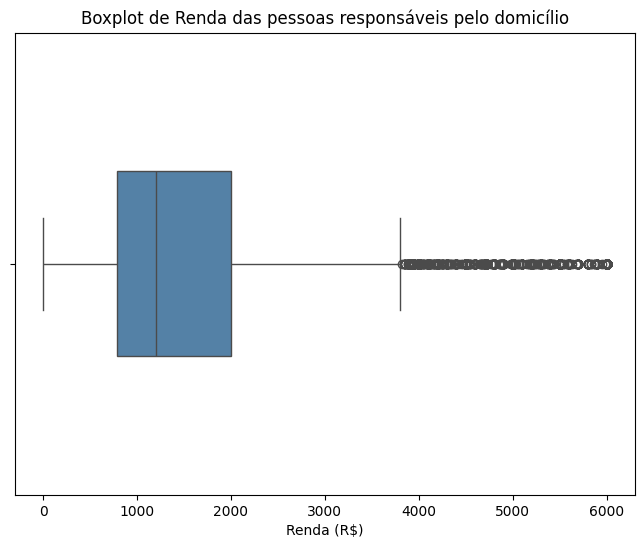

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=renda_6k['Renda'], color='steelblue')
plt.title('Boxplot de Renda das pessoas responsáveis pelo domicílio')
plt.xlabel('Renda (R$)')
plt.ylim(-1, 1)
plt.show()

> #### Conclusões

Através das análises feitas e da observação do gráfico, percebi que a mediana das rendas até 6000 não chega ao valor de 2000.

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

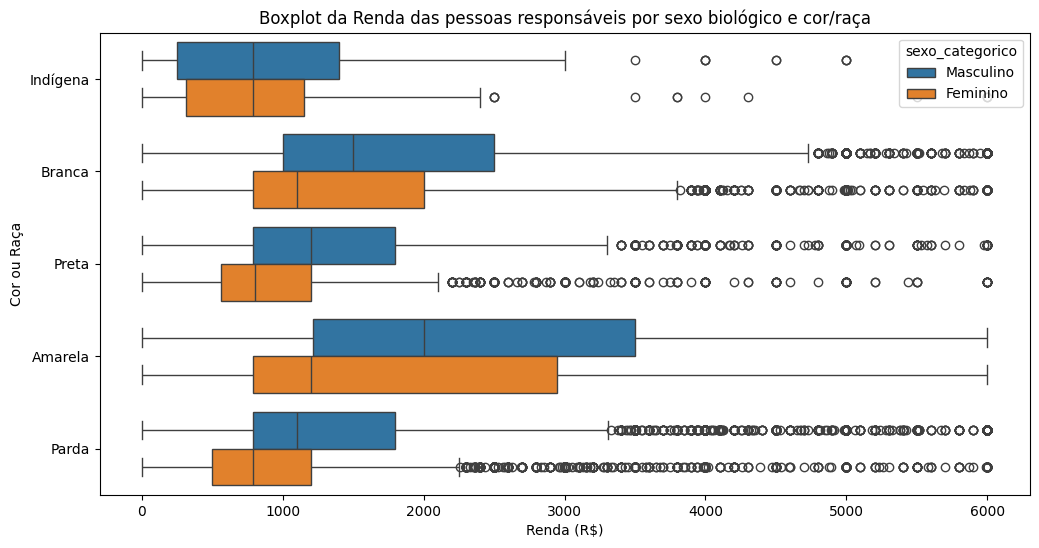

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Renda', y='cor_categorico', data=renda_6k, hue='sexo_categorico')
plt.title('Boxplot da Renda das pessoas responsáveis por sexo biológico e cor/raça')
plt.xlabel('Renda (R$)')
plt.ylabel('Cor ou Raça')
plt.show()

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

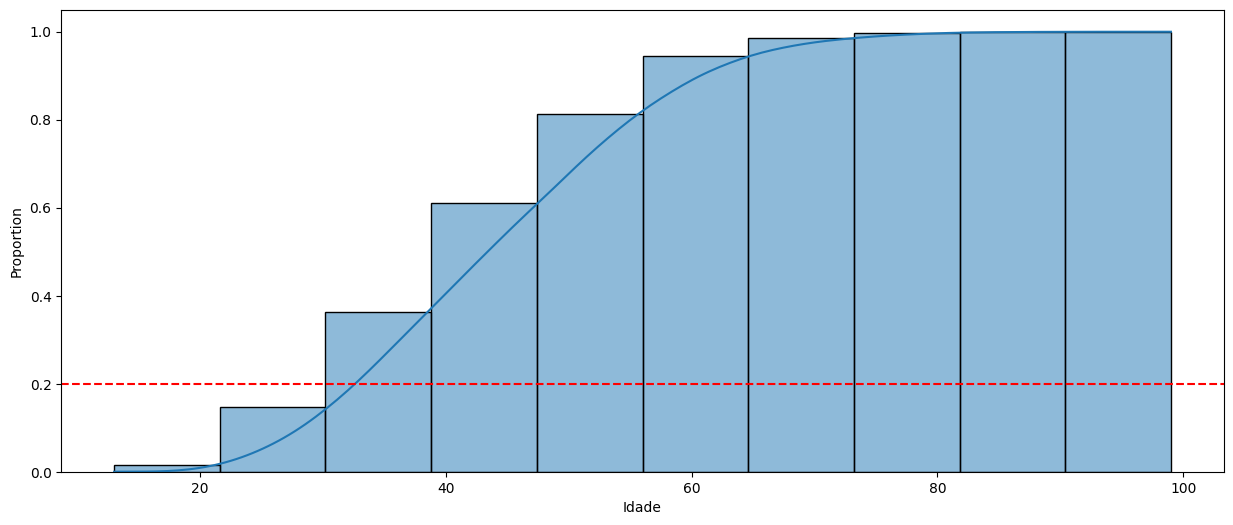

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data=dados, x='Idade', bins= 10, cumulative=True, stat='proportion', kde=True )
plt.axhline(0.20, color='red', linestyle='dashed')

plt.show()

In [ ]:
idades_classificacao = dados.copy()

In [ ]:
idades_classificacao = idades_classificacao.sort_values(by='Idade')
idades_classificacao['cumulativo'] = (idades_classificacao.reset_index().index + 1) / len(idades_classificacao)
idades_classificacao['qualificado'] = idades_classificacao['cumulativo'] <= 0.20
idades_classificacao.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,anos_de_estudo_categorico,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos,0.000065,True


In [ ]:
idades_qualificados = idades_classificacao[idades_classificacao['qualificado'] == True]
idades_qualificados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,anos_de_estudo_categorico,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos,0.000065,True


In [ ]:
len(idades_qualificados)

15368

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [ ]:
import numpy as np

In [ ]:
medidas_dispersao_renda = dados['Renda'].agg(
    desvio_medio_absoluto = lambda x: (abs(x - x.mean())).mean(),
    variancia = 'var',
    desvio_padrao = 'std'
).reset_index()
round(medidas_dispersao_renda,2)


,index,Renda
0,desvio_medio_absoluto,1526.50
1,variancia,11044906.01
2,desvio_padrao,3323.39


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo.**

In [ ]:
renda_estudo = dados.groupby('anos_de_estudo_categorico', observed=False)['Renda'].agg(
    media = 'mean',
    mediana = 'median',
    desvio_padrao = 'std'
).reset_index()
renda_estudo

,anos_de_estudo_categorico,media,mediana,desvio_padrao
0,Sem instrução e menos de 1 ano,732.994187,600.0,955.274843
1,1 ano,806.524496,700.0,1203.866292
2,2 anos,842.560209,788.0,1298.873800
3,3 anos,980.044275,788.0,1907.138437
4,4 anos,1150.439293,900.0,1293.144934
5,5 anos,1183.575683,940.0,1328.709017
6,6 anos,1284.082618,1000.0,1326.140204
7,7 anos,1289.166233,1000.0,1279.412081
8,8 anos,1437.744862,1100.0,1404.280340
9,9 anos,1315.685870,1000.0,1888.373952


##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [ ]:
renda_sexo_biologico = dados[dados['Renda'] <= 15000].groupby('sexo_categorico',observed=False )['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index()
round(renda_sexo_biologico,2)

,sexo_categorico,media,mediana,desvio_padrao
0,Masculino,1964.35,1300.0,2101.16
1,Feminino,1460.14,900.0,1763.69


<Axes: xlabel='Renda', ylabel='sexo_categorico'>

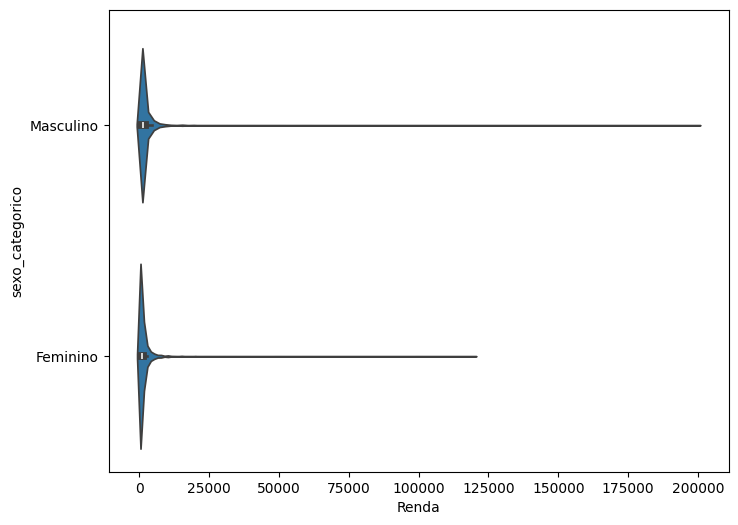

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Renda', y='sexo_categorico', data=dados)


> #### Conclusões

Observado e analisado que a renda no sexo masculino é mais distribuída do que no sexo feminino e grande diferença de renda nas médias e medianas.

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [ ]:
renda_10k_co = dados[dados['UF'].isin(['Goiás', 'Distrito Federal', 'Mato Grosso', 'Mato Grosso do Sul', 'Tocantins']) & (dados['Renda'] <=10e3)]
renda_10k_co

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,anos_de_estudo_categorico
10181,Tocantins,0,34,2,5,1300,1.68,Masculino,Branca,4 anos
10182,Tocantins,0,41,8,8,2000,1.65,Masculino,Parda,7 anos
10183,Tocantins,0,36,8,12,900,1.54,Masculino,Parda,11 anos
10184,Tocantins,1,51,8,2,800,1.84,Feminino,Parda,1 ano
10185,Tocantins,1,39,8,16,788,1.74,Feminino,Parda,15 anos ou mais
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


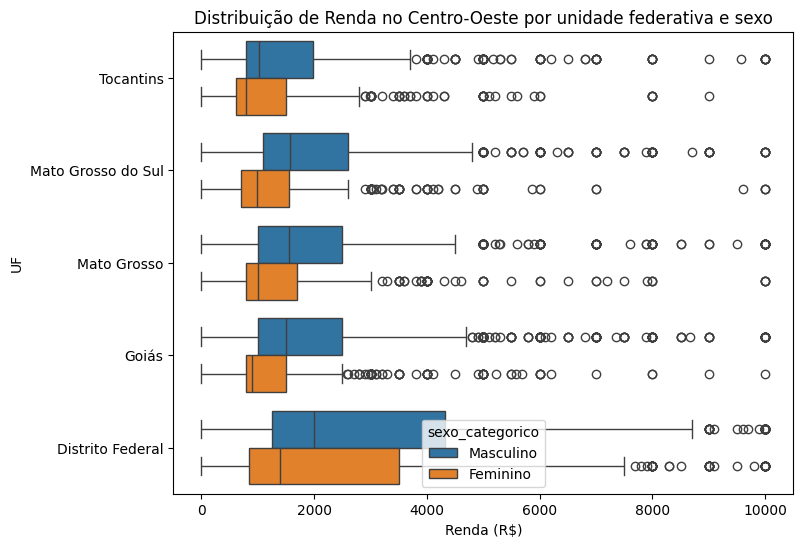

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='UF', data=renda_10k_co, hue='sexo_categorico')
plt.title('Distribuição de Renda no Centro-Oeste por unidade federativa e sexo')
plt.xlabel('Renda (R$)')
plt.ylabel('UF')
plt.show()

##### **Média**

In [ ]:
renda_10k_centro_oeste_media = round(pd.crosstab(renda_10k_co['sexo_categorico'], renda_10k_co['UF'], values=renda_10k_co['Renda'], aggfunc='mean'), 2)
renda_10k_centro_oeste_media

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
sexo_categorico,,,,,
Masculino,3138.46,2030.06,2092.10,2181.73,1598.92
Feminino,2551.87,1284.65,1548.93,1396.69,1381.80


##### **Mediana**

In [ ]:
renda_10k_centro_oeste_mediana =  round(pd.crosstab(renda_10k_co['sexo_categorico'], renda_10k_co['UF'], values=renda_10k_co['Renda'], aggfunc='median'), 2)
renda_10k_centro_oeste_mediana

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
sexo_categorico,,,,,
Masculino,2000.0,1500.0,1560.0,1576.0,1020.0
Feminino,1400.0,900.0,1000.0,986.0,788.0


##### **Desvio Padrão**

In [ ]:
renda_10k_centro_oeste_sd = round(pd.crosstab(renda_10k_co['sexo_categorico'], renda_10k_co['UF'], values=renda_10k_co['Renda'], aggfunc='std'), 2)
renda_10k_centro_oeste_sd

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
sexo_categorico,,,,,
Masculino,2513.43,1587.38,1707.91,1773.44,1632.05
Feminino,2451.17,1110.00,1508.59,1400.90,1516.37
